In [ ]:
###### This looks at the pixel and compares the wavelengths from different calibrations
###### Also works to convert the original wavelengths to the calibrated ones

In [1]:
import numpy as np
import glob
import scipy.signal as scs
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel, VoigtModel, LinearModel, ConstantModel
import sys
sys.path.append('D:\\gitCCA\\CESdesign\\py')
import CESfunctions_dev as cf

[   0    1    2 ... 3645 3646 3647]


(440.0, 459.0)

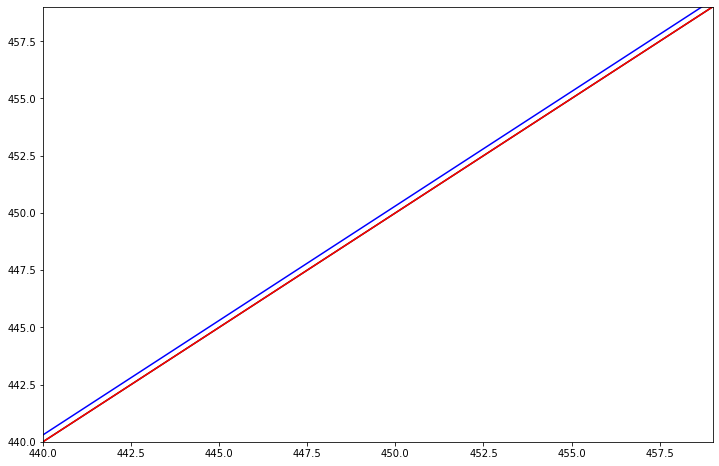

In [106]:
folder = "D:\\CCA\\ICACC-BBCEAS\\dataset1\\20220316\\"
data = np.load(folder+"Data.npy")

i1=2.47501800537109e2
c11=1.68251454830170e-1
c12=-2.75231491286831e-6
c13=-2.59874649577441e-10

i2=2.47080093383789e2
c21=1.69589176774025e-1
c22=-3.51128119291388e-6
c23=-1.37265324107183e-10

pixel=np.arange(len(data[:,0]))
wv1= i1+c11*pixel+c12*pow(pixel,2)+c13*pow(pixel,3)
wv2= i2+c21*pixel+c22*pow(pixel,2)+c23*pow(pixel,3)
print(pixel)

f = plt.figure(figsize=(12,8))
ax1 = f.add_subplot(111)

ax1.plot(data[:,0],data[:,0],'-k',label="")
ax1.plot(data[:,0],wv1,'-r',label="")
ax1.plot(data[:,0],wv2,'-b',label="")


ax1.set_xlim(440,459)
ax1.set_ylim(440,459)

In [107]:
i2=2.47080093383789e2
c21=1.69589176774025e-1
c22=-3.51128119291388e-6
c23=-1.37265324107183e-10

dirlist =[]
rootdir = 'D:\\CCA\\ICACC-BBCEAS\\dataset1\\'
for path in glob.glob(rootdir+'*\\'):
    dirlist.append(path)

for folder in dirlist[:-1]:
    data = np.load(folder+"Data.npy")
    pixel=np.arange(len(data[:,0]))
    wv2= i2+c21*pixel+c22*pow(pixel,2)+c23*pow(pixel,3)
    Idata = np.concatenate((wv2.reshape(len(wv2[:]),1),data[:,1:]),axis=1)
    np.save(folder+"Data_Wavelength_Calibrated",Idata)
    print(data.shape,Idata.shape)
    print(data[:,0])
    print(Idata[:,0])

(3648, 502) (3648, 502)
[247.50180054 247.6700592  247.83828735 ... 811.62591553 811.76379395
 811.90155029]
[247.08009338 247.24967905 247.41925769 ... 818.419299   818.55781479
 818.69632056]
(3648, 532) (3648, 532)
[247.50180054 247.6700592  247.83828735 ... 811.62591553 811.76379395
 811.90155029]
[247.08009338 247.24967905 247.41925769 ... 818.419299   818.55781479
 818.69632056]
(3648, 532) (3648, 532)
[247.50180054 247.6700592  247.83828735 ... 811.62591553 811.76379395
 811.90155029]
[247.08009338 247.24967905 247.41925769 ... 818.419299   818.55781479
 818.69632056]
(3648, 432) (3648, 432)
[247.50180054 247.6700592  247.83828735 ... 811.62591553 811.76379395
 811.90155029]
[247.08009338 247.24967905 247.41925769 ... 818.419299   818.55781479
 818.69632056]
(3648, 502) (3648, 502)
[247.50180054 247.6700592  247.83828735 ... 811.62591553 811.76379395
 811.90155029]
[247.08009338 247.24967905 247.41925769 ... 818.419299   818.55781479
 818.69632056]
(3648, 503) (3648, 503)
[247.5